<a href="https://colab.research.google.com/github/syamsulrizal123/Data_Mining/blob/main/iris_dataset_Contoh_Program_KNN_dan_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd drive/My\ Drive/Colab Notebooks (1)

/content/drive/My Drive/Colab Notebooks (1)


In [ ]:
ls

 ann_sederhana.ipynb      forest_test.jpg          scenes_cnn.ipynb
 cancer_dataset.ipynb     program1.ipynb           Untitled0.ipynb
'Copy of Syamsul.ipynb'   program1_syamsul.ipynb
 data_cancer.csv          Python1.ipynb


In [2]:
#import library yang dibutuhkan
import numpy as np
import pandas as pd

In [61]:
#baca dataset
dataset = pd.read_csv('data_cancer.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
#cek ukuran dataset
print(dataset.shape)

(150, 6)


In [13]:
#cek apakah ada fitur yang kosong
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
dataset=dataset.drop(columns=['Unnamed: 32'])
print(dataset.head())
print(dataset.shape)

         id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302         M  ...          0.4601                  0.11890
1    842517         M  ...          0.2750                  0.08902
2  84300903         M  ...          0.3613                  0.08758
3  84348301         M  ...          0.6638                  0.17300
4  84358402         M  ...          0.2364                  0.07678

[5 rows x 32 columns]
(569, 32)


In [14]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
#masukan dataset ke variabel X dan Y, X untuk fitur Y untuk labelnya
X=dataset.iloc[:,1:5].values
Y=dataset.iloc[:,5].values
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [31]:
print(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [ ]:
print(Y[0:5])

['M' 'M' 'M' 'M' 'M']


In [32]:
#kita ubah data string ke bentuk integer untuk 2 kelas
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
print(Y[0:5])

[0 0 0 0 0]


In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Y = lb.fit_transform(Y)
print(Y)

In [33]:
#kita bagi dataset menjadi data training dan data test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 5)
print(X_train.shape)
print(X_test.shape)


(112, 4)
(38, 4)


In [ ]:
#kita lakukan fitur scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train[0,0:9])
print(X_test[0,0:9])

[ 1.92441392 -0.40539592  1.8412917   2.06880417 -0.14042356  0.1076024
  0.88019761  1.09825451 -0.8483585 ]
[0.2701831  1.21509766 0.35049099 0.14266194 0.88872309 1.04662337
 0.79004298 0.85890602 0.3671832 ]


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#menggunakan logisticregression model
# classifier = LogisticRegression(random_state = 2)

#Using KNN
classifier = KNeighborsClassifier(n_neighbors = 5)

#Using SVC method of svm class to use Support Vector Machine Algorithm
# classifier = SVC(kernel = 'linear', random_state = 0)

#Using GaussianNB
# classifier = GaussianNB()

#Using Decision Tree Algorithm
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

#Using Random Forest Classification algorithm
# classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [57]:
#training data
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [58]:
#predict data test untuk mencari akurasi
Y_pred = classifier.predict(X_test)

In [37]:
Y_pred

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

In [39]:
Y_test

array([1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.9210526315789473

In [40]:
from sklearn.metrics import classification_report
pred_report=classification_report(Y_pred, Y_test)
print(pred_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [41]:
#mencari confusion metric
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [42]:
print(cm)

[[12  0  0]
 [ 0 13  1]
 [ 0  0 12]]


In [ ]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

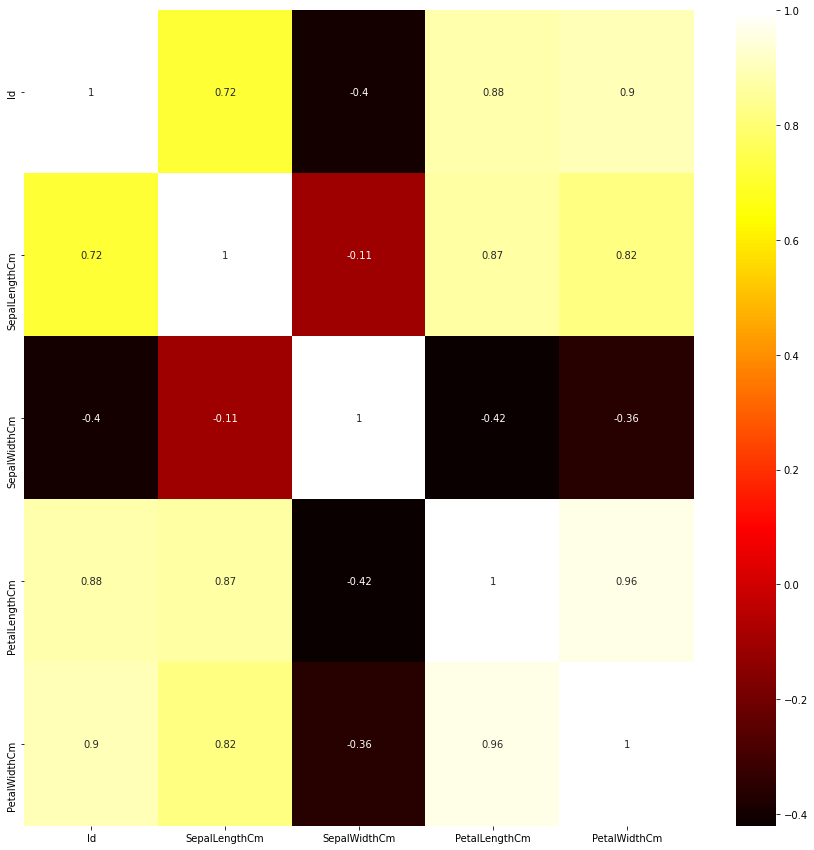

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='hot')
plt.show()

In [ ]:
X2=dataset[['texture_mean', 'perimeter_mean', 'radius_worst', 'perimeter_worst', 'area_worst']]
Y2=dataset[['diagnosis']]
print(X2)
print(Y2)

     texture_mean  perimeter_mean  radius_worst  perimeter_worst  area_worst
0           10.38          122.80        25.380           184.60      2019.0
1           17.77          132.90        24.990           158.80      1956.0
2           21.25          130.00        23.570           152.50      1709.0
3           20.38           77.58        14.910            98.87       567.7
4           14.34          135.10        22.540           152.20      1575.0
..            ...             ...           ...              ...         ...
564         22.39          142.00        25.450           166.10      2027.0
565         28.25          131.20        23.690           155.00      1731.0
566         28.08          108.30        18.980           126.70      1124.0
567         29.33          140.10        25.740           184.60      1821.0
568         24.54           47.92         9.456            59.16       268.6

[569 rows x 5 columns]
    diagnosis
0           M
1           M
2         

In [ ]:
X2=X2.values
Y2=Y2.values

In [ ]:
print(X2.shape)
print(Y2.shape)

(569, 5)
(569,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y2 = labelencoder_Y.fit_transform(Y2)
print(Y2[0:5])

[1 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.25, random_state = 5)

In [ ]:
print(X_train2.shape)
print(X_test2.shape)
print(Y_train2.shape)
print(Y_test2.shape)

(426, 5)
(143, 5)
(426,)
(143,)


In [ ]:
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.fit_transform(X_test2)

In [ ]:
classifier2 = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
classifier2.fit(X_train2, Y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
Y_pred2 = classifier2.predict(X_test2)

In [ ]:
accuracy_score(Y_test2, Y_pred2)

0.9440559440559441

In [ ]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
PCA_dataset = pca_breast.fit_transform(X_train)

In [ ]:
PCA_dataset = pd.DataFrame(data = PCA_dataset
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
PCA_dataset.head()

,principal component 1,principal component 2
0,4.155151,-3.688649
1,-2.962116,0.598729
2,0.131908,1.759449
3,0.865145,7.959476
4,5.585155,-1.995052


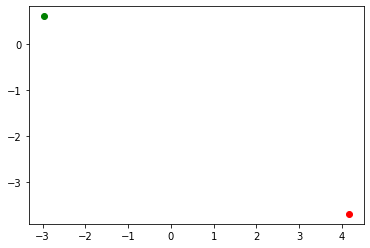

In [ ]:
x=PCA_dataset['principal component 1']
y=PCA_dataset['principal component 2']
colors = ['r', 'g']
i=0
plt.figure()

for y, c in zip(y, colors):
    plt.scatter(x[i], y, color=c)
    i += 1

# plt.scatter(PCA_dataset['principal component 1'], PCA_dataset['principal component 2'])

In [ ]:
dataset['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

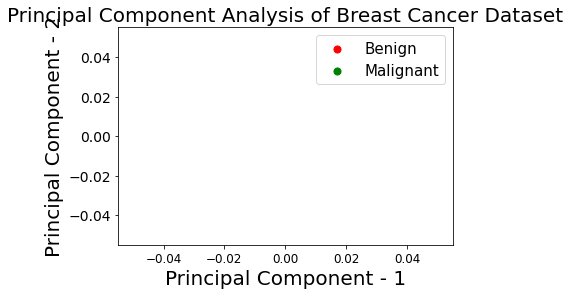

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
# plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = dataset['diagnosis'] == target
    plt.scatter(PCA_dataset.loc[indicesToKeep, 'principal component 1']
               , PCA_dataset.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})